# Projeto 1 - Ciência dos Dados

Nome: Giovanni Rozatti

Nome: Gabriel Parfan Guimarães

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\User\OneDrive - Insper - Institudo de Ensino e Pesquisa\Desktop\Insper\2°Semestre DP\CDados\CD2020-Projeto1


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

___
## Classificador automático de sentimento


- Produto escolhido: Atila Iamariano (@oatila)
- Descrição do Produto: 

    Atila Iamarino (1984)é um biólogo e pesquisador brasileiro formado em microbiologia, possuindo também doutorado em virologia, notório por seu trabalho no canal de YouTube denominado "Nerdologia",que possui mais de 2 milhões de inscritos e integra o grupo Jovem Nerd, uma plataforma digital de cultura pop, jogos eletrônicos e conteúdo jovem. -Wikipedia  
    
    Átila já era bastante conhecido por seu canal no Youtube e por sua participação em podcasts, principalment do podcast Jovem Nerd) popularidade de Atila cresceu bastante atualmente, principalmente por conta do COVID-19, chegando a transmitir lives diárias, para falar da situação atual, cuidados preventivos e fazendo predições com uso de estatísticas e dados sobre como a situação se desdobraria, chegando a até mesmo a participar de um Programa do Roda-Viva `https://www.youtube.com/watch?v=s00BzYazxvU` - Observação de Giovanni Rozatti
    ________________________________________________________________________________________________

- Método de classificação: 
foram realizados 2 níveis de classificação, no primeiro foi classificada a relêvancia da mensagem, e no segundo era avaliado o teor da mensagem
___

Nível 1 de classificação:

- Relevante: Tweets que contribuiriam com o processo de classificação por estarem relacionados ou ao tema discutido ou a algo próximo e/ou que continham elementos possiveis para que fosse feita a classificação do teor de sua mensagem  
    
- Irrelevante: Tweets que não contribuiam com o processo de classificação e/ou não podiam ser classificados por falta de elementos que possibilitassem isso,como por exemplo: "@atila que hrs são" (esse tweet de fato apareeu na base de dados)  
    <font color=#DD4040>**Observação**: mensagens curtas demais com palavras inéditas ou menos frequentes também caem nessa categoria</font>
    
- Opinião Política: Tweets que continham mensagens de teor político e/ou próximos a política explícitos, como por exemplo, os termos que apareceram com recorrencia considerável : "bolsominion" e "comunista"
    
Nesse nível as mensagens foram separadas nas três categorias acima, com o objetivo de fazer uma refiltragem dos tweets obtidos, originalmente seriam apenas duas categorias (Relevante e Irrelevante), no entanto ao decorrer do processo foi vista a necessidade de estender ainda mais esse escopo, isso possibilitará a classificação das mensagens excluindo as irrelevantes e as que possuem teor político, assim como a classificação excluindo apenas as irrelevantes nos fornecendo como resultado a resposta da pergunta:
"Quanto as mensagens com teor político influenciam de fato na classificação?"
___

Nível 2 de classificação:


- Classificações atribuidas e o que levou a atribuirmos fraases a elas:

    - Show and tell: Tweets que em geral além de serem mensagens de apoiar/concordar, traziam perguntas, pesquisas, dados, materiais de referencia e fontes para embasamentos e reflexões, em geral continham teor similar ao dos exemplos a seguir: "@oatila @maisalguem vocês viram isso?", "@atila, o que voce acha de...?"  
    
    - Apoia/concorda: Tweets que em geral dizem: "@oatila parabens pelo trabalho", "@oatila bacana essa info que você apresentou"  
    
    - Discorda/Desacredita: Tweets que em geral fazem críticas ao trabalho feito, ou a uma posição que foi tomada, não necessariamente apresentando embasamento sobre o porque da crítica  
    
    - Mensagem de ódio:Tweets que apresentam mensagens ofensivas a esmo, (não necessáriamente ao biologo, mas ainda assim perinentes ao trabalho como será visto mais adiante nesse Notebook)*  
    
Nesse nível as mensagens foram separadas nas quatro categorias acima, com o objetivo de própriamente classificá-las para que pudessem passar pelo processo de slicing e classificação de palavras
A classificação nessa parte foi feita de acordo com o seguinte método:   
1. Se possível classificar como o classifiador Naive Bayes final do projeto faria, isso é analisar as palavras individualmente tentando prever o resultado da classificação.    
2. Se não for possível classificar via método anterior classificar a frase como um todo de acordo com o teor que contém
3. Se não for possível classificar de acordo com método anterior, marcar tweet como Irrelevante no nível de classificação 1**

  $*$ Muitas das mensagens de ódio não estavam sendo direcionadas ao Biólogo mas a principalmente à @embaixadadachina e @mariuzakrause  
  $**$Não hoveram casos em que o método 3 tenha sido utilizado

   - @embaixadadachina:Trazendo a China para perto de você! Conta oficial da Embaixada da República Popular da China na República Federativa do Brasil. - bio no twitter da embaixada  
        Foi alvo de várias mensagens de ódio falando principalmente:sobre sistema político-sócio-econômico chinês, e acusações de culpa pela disseminação do COVID-19, por conta de supostas alerações em estatísticas e por o vírus ser "uma criação deles"; A motivação dessas mensagens foi que o biólogo ter utilizado de pesquisas fornecidas pelo país

   - @mariuzakrause: Direita, conservadora, bolsonariana, Jacobina, gado do Bolsonaro, Advogada nas horas vagas, petistas desapareçam! - bio no twitter de Mariuza  
         
        Foi alvo de várias mensagens de ódio falando principalmente:sobre sua oientação política, autenticidade de sua formação em direito; A motivação dessas mensagens foi que mariuza discordou publiamente sobre o posicionamento do biólogo em relação a quarentena, chegando a difamá-lo em relação aos resultados obtidos através de algumas pesquisas dizendo que Átila estaria "passando vergonha"


___
<font color=#EF3333> - **Observação: a estrutura do código a seguir é similar ao do usado no meu trabalho no semestre anterior (perfil no git: VonIgnia), e pode ser visto em: `https://github.com/carolinechaim/Projeto_2/blob/master/NaiveBayes teste 1.ipynb` mais especificamente nos commits "Planilha teste rodando no Jupyter" e "Planilha teste rodando os classificadores NaiveBayes".**</font>

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [3]:
#Lê as planilhas de treinamento
training = pd.read_excel("@oatila1BACKUP.xlsx",sheet_name = 'Treinamento', index = False)

In [4]:
#A função elimina tweets considerados como irrlevantes para o classificador

#A variável Elimina recebe uma string pertencente a categoria Nivel de Relevancia 
#("Relevante", "Irrelevante" e "Opinião Política")

def Elimina_por_nível_de_relevância(train,Elimina):
    for i in range(0, len(Elimina)):
        train.drop(train[ train['Nível de relevância'] == Elimina[i].rstrip()].index, inplace=True)
    return train

#A função calcula as frequências relativas de cada categoria
def Calcula_frequencias_relativas(train,relative):
#Calcula as frequências relativas de cada categoria dentre o que foi considerado Relevante
    probs = train["Opinião Pública"].value_counts(relative,sort=False)
    return probs

In [5]:
#lista de categorias a serem eliminadas
Relev_Eliminate = ['Irrelevante','Opinião Política']

#chamando por outro nome para evitar o re-run de training /n
#caso contrário training assumiria o valor do return da /n
#função o que deixaria tudo mais complicado

treino = Elimina_por_nível_de_relevância (training,Relev_Eliminate)
Calcula_frequencias_relativas(treino,True)

Mensagem de ódio        0.216418
Show and tell           0.283582
Apoio/Concorda          0.320896
Discorda/Desacredita    0.179104
Name: Opinião Pública, dtype: float64

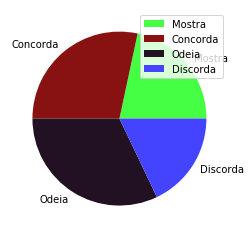

In [6]:
#Como facilita a vizualização e como engenheiros gostam aqui temos um gráfico
plt.pie(treino["Opinião Pública"].value_counts(sort=False),
    labels=['Mostra','Concorda','Odeia','Discorda'], 
    #03/04 Mensagem para dev: Mudar cor para refletir o significado da opinião,cores com hexadecimais altos
    colors=["#44FF44","#881111","#221122","#4444FF"]);
plt.legend()
plt.show()

Separa todas as palavras que aparecem em cada categoria no formato de uma Série

In [7]:
def Separa_palavras_em_series(train,lista_classificações):
    series_categories=[]
    for i in range(0,len(lista_classificações)):
        category = train[train["Opinião Pública"] == lista_classificações[i]]
        category = category["Treinamento"].str.cat().split()
        series_categories.append(pd.Series(category))
#====================================================================================================== 
    #-------------------------------------------------
      ### tentativa (falha) de deixar o código genérico e portanto aplicável a qq objeto de estudo /n
      ### para qq número de ccategorias, quaisquer que fosse sua ordem:
    #------------\/código das tentativas\/--------------    
        #for i in range(0,len(series_categories)):
           # setattr('Series'+str(lista_classificações[i], 'foobar', series_categories[i])
           # eval('Series'+str(lista_classificações[i]))series_categories[i]
    #-------------------------------------------------
#======================================================================================================    
    return series_categories
lista_classificações = treino["Opinião Pública"].value_counts(sort=False).index.tolist()
series_categorias = Separa_palavras_em_series(treino,lista_classificações) #Uma lista de 4 series;

In [8]:
#isso só pode ser feito quando Sort=False e quando a ordem,/n
#é conhecida caso contrário pode criar erros no classificador
series_Apoia    = pd.Series(series_categorias[0])
series_Discorda = pd.Series(series_categorias[1])
series_Odeia    = pd.Series(series_categorias[2])
series_Mostra   = pd.Series(series_categorias[3])

Criando uma "tabela" com a probabilidade individual de todas as palavras aparecerem em uma dada categoria
("Dado que a opinião é essa qual a probabilidade dessa palavra aparecer?")

In [9]:
tabela_Apoia    = series_Apoia.value_counts(True)
tabela_Discorda = series_Discorda.value_counts(True)
tabela_Odeia    = series_Odeia.value_counts(True)
tabela_Mostra   = series_Mostra.value_counts(True)

"Raptando" a função de limpeza de pontuações e sinais do notebook da aula 7:

In [10]:
import re 
def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    #punctuation = '[!-.:?;")(]' # Note que os sinais [] são delimitadores de um conjunto.
    punctuation ="['(',')','"',"'",',','.',':']"
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

In [21]:
exemplo1='A (definição) de "insanidade" é. fazer a, mesma coisa /n repetidamente e esperar resultados diferentes.'
cleanup(exemplo1) 
#cleanup funciona... talvez seja a forma com que a função estaja chamando o texto a ser limpo seja incorreta

'A  definição  de  insanidade  é  fazer a  mesma coisa /n repetidamente e esperar resultados diferentes '

Criando uma função que faz o calculo da frase pertencer a uma categoria utilizando a fórmula de bayes

In [22]:
def limpeza_total(tweet):
    cleanup(tweet)
    lista_palavras = tweet.split()
    return(lista_palavras)
limpeza_total()

In [25]:
#checa as eliminações de string com @
checagem1="@oatila @mariuzakrauze \n texto aqui exemplo@jovemnerd " #checa as eliminações de string com @
limpeza_total(checagem1)

#03/04- Foi descoberto que a função limpeza total não estava funcionando corretamente /n
#isso é um problema pois @marianakreuza e @embaichadadachina constituem um viés para/
#a classificação, fazendo-a tender para "Mensagem de ódio" e "Discorda/desacretita"

#03/04- Pesquisas no stack overflow indicam o uso da biblioteca re (a mesma utilizada na função cleanup)

#Depuração limpeza total não faz nada em relação À @ e a palavras com @, portanto essa parte da função \n
#será eliminada (também não faz nada em relação á quebra de linhas então essa também será cortada)

['@oatila', '@mariuzakrauze', 'texto', 'aqui', 'exemplo@jovemnerd']

In [31]:
def classificador_de_palavras_multinomial_naive_bayes(tweet):  
    
    limpeza_total(tweet)
    for palavra in limpeza_total(tweet):
        prob_Apoia = 1
        prob_Discorda = 1
        prob_Odeia = 1
        prob_Mostra = 1
    
    #===========================================================    
        #---------------------------------------------------
        if palavra in tabela_Apoia.index:
            prob_palavra_Apoia = tabela_Apoia[palavra]
        else:
            prob_palavra_Apoia = 1
        #---------------------------------------------------    
        if palavra in tabela_Discorda.index:
            prob_palavra_Discorda = tabela_Discorda[palavra]
        else:
            prob_palavra_Discorda = 1
        #---------------------------------------------------
        if palavra in tabela_Odeia.index:
            prob_palavra_Odeia = tabela_Odeia[palavra]
        else:
            prob_palavra_Odeia = 1
        #---------------------------------------------------
        if palavra in tabela_Mostra.index:
            prob_palavra_Mostra = tabela_Mostra[palavra]
        else:
            prob_palavra_Mostra = 1
        #---------------------------------------------------
    #===========================================================
        #a lista_prob foi um Update em 03/04 foi criada para bug fixing,caso bugs se mantenham \n
        #eliminar Opinião Politica de Relevante
        
        #Update em 03/04:Remoção de Op.Política
        
        #Update em 03/04 erro continua a existir, será necessário fazer uma depuração de todo código\n
        #no momento considero que o erro se deve a uma ou mais das seguintes altenativas:
        
        #-(Quase certamente o problema é aqui, visto que os cálculos não forsm alterados)
        # Processo de slicing das strings, os erros começaram pouco após a mudança na função limpeza_total \n
        #no entanto persistiram após a sua eliminação, muito provavelmente essa não é a causa, além disso \n
        #alem disso consigo imaginar problema em cleanup, problema em \n
        #classificador_de_palavras_multinomial_naive_bayes,
        #problema na leitura da planilha
        
        #Em depuração foi descoberto que o erro do código estava no conjunto de limpezas da string \n
        #Um novo notebook será montado e esse aqui ficará obsoleto servindo apenas como relatório de execução\n
        #e de erros ocorridos até o dia 03/04 dia em que os erros se iniciaram, nesse novo notebook excluiremos n
        #temporáriamente as funções de limpeza que não estavam sendo utilizadas ou declaradas corretamente
        
        prob_Apoia *= prob_palavra_Apoia
        prob_Discorda *= prob_palavra_Discorda
        prob_Odeia *= prob_palavra_Odeia
        prob_Mostra *= prob_palavra_Mostra
        
    #=========================================================== 
    #Se não houver alteração no valor inicial (1) é porque não /n
    # foram detectadas nenhuma  pertencente áquela categoria
    #Reseta a probabilidade da categoria.
    # (transformar em função??????????????)

        #---------------------------------------------------
        if prob_Apoia == 1:
            prob_Apoia =0
        #---------------------------------------------------
        if prob_Discorda == 1:
            prob_Discorda =0
        #---------------------------------------------------
        if prob_Odeia == 1:
            prob_Odeia =0
        #---------------------------------------------------
        if prob_Mostra == 1:
            prob_Mostra =0
        #---------------------------------------------------    
    
            if (prob_Apoia > prob_Discorda) and (prob_Apoia > prob_Mostra) and (prob_Apoia > prob_Odeia):
                return "Apoio/Concorda"
            elif (prob_Mostra > prob_Apoia) and (prob_Mostra > prob_Discorda) and (prob_Mostra > prob_Odeia):
                return "Show and tell"
            elif (prob_Discorda > prob_Apoia) and (prob_Discorda > prob_Mostra) and (prob_Discorda > prob_Odeia):
                return "Discorda/Desacredita"
            elif (prob_Odeia > prob_Apoia) and (prob_Odeia > prob_Discorda) and (prob_Odeia > prob_Mostra):
                return "Mensagem de ódio"
            else:
                return "Erro"

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

leitura da planilha para testes com o classificador

In [32]:
test = pd.read_excel("@oatila1.xlsx",sheet_name = 'Teste', index = False).set_index("Teste")
target = test["Target"]
test = test.drop(columns=["Target"])
lista_tweets = list(test.index)

In [33]:
for tweet in lista_tweets:
    test.loc[tweet,"Classificação"] = classificador_de_palavras_multinomial_naive_bayes(tweet)
test

,Classificação
Teste,
"@mariuzakrause @oatila toma essa jantada ai, mula, nao sabe fazer uma pesquisa antes de falar bosta na internet. vai cuidar dos seus netos. infeliz",Apoio/Concorda
@luis_wback @daciolocable @oatila usar uma única fonte como referência é a antítese da ciência. \npassar bem.,Erro
@embaixadachina @oatila foda-se a china e esse biólogo de fundo de quintal!,Apoio/Concorda
"@oatila isso ainda é uma dúvida né, ainda não é 100% certo que vc fiquei imunizado depois da primeira infecção.\n\ne a certeza disso pode mudar tudo....",Mensagem de ódio
@oatila é possível contrair gripe e covid19 simultaneamente?,Discorda/Desacredita
"@oatila mania de perguntar pra cientista ""você acredita em tal coisa?"". não, não é fé é fato. sem dados, sem inferências.",Erro
@mariuzakrause @oatila eita que a mocinha da direitinha conservadorinha se sentiu ofendida...\neu tb me sentiria ofendida se tivesse o cérebro do tamanho de uma ervilha igual ao seu. deve ser muito difícil bater de frente com um cientista e ser humilhada com fatos.,Apoio/Concorda
"@mariuzakrause @oatila mariuza, que feio. apaga essa vergonha pois anthony fauci, infectologista que integra a equipe do trump afirmou isso mesmo. \n\nque mico vc pagou, hein, dona?",Apoio/Concorda
"@oatila cara, eu tô falando isso desde o início do mês. muito igual",Mensagem de ódio


In [29]:
acertos=0
for i in range(len(test)):
        if test.Classificação[i]==target[i]:
            acertos+=1

In [30]:
test.Classificação.value_counts()

0                       214
Apoio/Concorda          134
Mensagem de ódio         26
Discorda/Desacredita     25
Name: Classificação, dtype: int64

In [19]:
target.value_counts()

Apoio/Concorda          16
Discorda/Desacredita    15
Show and tell           14
Mensagem de ódio        12
Name: Target, dtype: int64

ValueError: 'label' must be of length 'x'

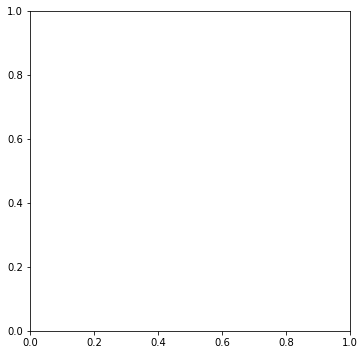

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1)
plt.pie(test.Classificação.value_counts(sort=False),
    labels=['Concorda','Discorda','Odeia'], 
    colors=["#44FF44","#881111","221122"]);
plt.legend()
#---------------------------

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 2)
plt.pie(test.Classificação.value_counts(sort=False),
    labels=['Concorda','Discorda','Odeia'], 
    colors=["#44FF44","#881111","221122"]);
plt.legend()
#---------------------------

plt.figure(figsize=(20,20))
plt.subplot(3, 1, 3)
plt.pie([acertos,len(test)-acertos],
    explode=[1,-.95],
    labels=['Acertos','Erros'], 
    colors=["#44FF44","#881111"]);
plt.legend()

plt.show()

___
### Concluindo

Versão 1  (o objeto de clasificação ainda era Cinemark, mas como os erros daquela versão poderiam se repetir nessa e serviram para reflexões além de elaborações de uma maneira de "consertá-los".)
22/03- o código roda mas claramente a classificação está com imperfeições isso pode se dar por:
 - erros de contabilização na fórmula do NaiveBayes
 - erros na clasificação do excel
 - certas palavras possuirem um viés deterministico mais forte para um dos lados (no caso a Opinião Positiva)

___
## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* <font color=#0FCF22> Limpar: \n, :, ", ', (, ), etc SEM remover emojis  </font>
* <font color=#FF0101> Corrigir separação de espaços entre palavras e emojis ou entre emojis e emojis </font>
* <font color=#0F22CF> Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação </font>
* <font color=#0FCF22> Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B) </font>
* <font color=#0F22CF> Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento </font>
* <font color=#0F22CF> Propor diferentes cenários para Naïve Bayes fora do contexto do projeto </font>
* <font color=#0FCF22> Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa) </font>
* <font color=#FF0101> Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados </font>

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**